CNN 학습 결과가 잘 나오는 MNIST 데이터셋으로 실습을 진행해봅시다!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt

In [2]:
# myCNN 클래스 정의
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 5, padding = 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 5, padding = 2)
        self.fc1 = nn.Linear(128*3*3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 128*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('./data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1000, shuffle = False)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.80MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.78MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



모델, 손실 함수, 최적화 알고리즘 설정 ✅

In [5]:
# TODO

model = myCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []
test_accuracies = []

모델 학습 ✅

In [6]:
# TODO

def train_model():
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

모델 평가 ✅

In [7]:
# TODO

def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)

10회 반복 시행 ✅

In [8]:
# TODO

for epoch in range(epochs):
    train_model()
    evaluate_model()
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%')

Epoch 1/10, Training Loss: 0.1387, Test Loss: 0.0324, Test Accuracy: 98.90%
Epoch 2/10, Training Loss: 0.0377, Test Loss: 0.0431, Test Accuracy: 98.52%
Epoch 3/10, Training Loss: 0.0253, Test Loss: 0.0215, Test Accuracy: 99.32%
Epoch 4/10, Training Loss: 0.0219, Test Loss: 0.0290, Test Accuracy: 99.03%
Epoch 5/10, Training Loss: 0.0164, Test Loss: 0.0264, Test Accuracy: 99.21%
Epoch 6/10, Training Loss: 0.0137, Test Loss: 0.0217, Test Accuracy: 99.29%
Epoch 7/10, Training Loss: 0.0101, Test Loss: 0.0318, Test Accuracy: 99.09%
Epoch 8/10, Training Loss: 0.0131, Test Loss: 0.0264, Test Accuracy: 99.29%
Epoch 9/10, Training Loss: 0.0069, Test Loss: 0.0349, Test Accuracy: 99.12%
Epoch 10/10, Training Loss: 0.0113, Test Loss: 0.0366, Test Accuracy: 99.05%


결과 시각화

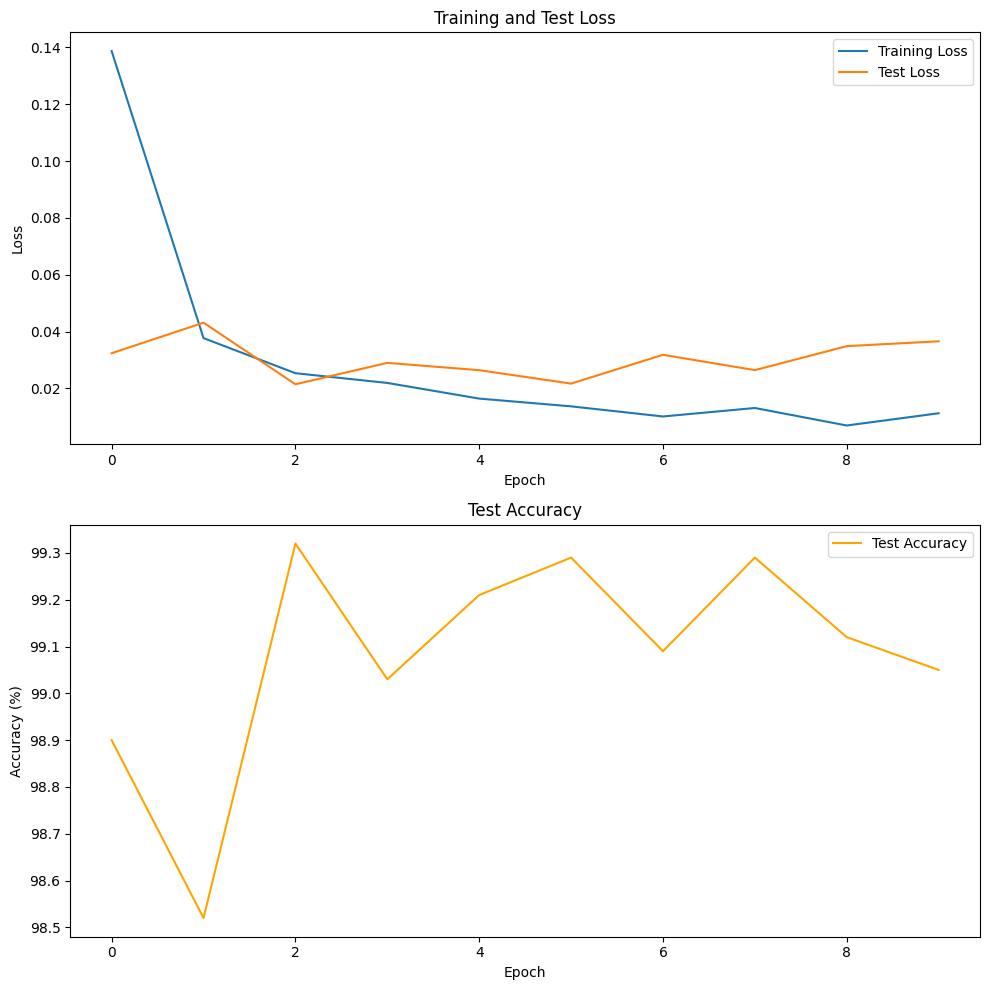

In [9]:
# 손실 및 정확도 시각화
fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(train_losses, label = 'Training Loss')
axs[0].plot(test_losses, label = 'Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()